In [1]:
import math
from tqdm import tqdm
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import Sequence, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

2021-10-09 15:49:24.942720: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-09 15:49:24.942759: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
%matplotlib inline
%load_ext autotime

time: 280 µs (started: 2021-10-09 15:49:26 +00:00)


In [3]:
%run dataset.ipynb
%run utils.ipynb

time: 447 ms (started: 2021-10-09 15:49:26 +00:00)


In [4]:
## Loading data

time: 290 µs (started: 2021-10-09 15:49:27 +00:00)


In [5]:
X_train, X_test, Y_train, Y_test = load_dataset(test_size=0.1)

time: 5.5 s (started: 2021-10-09 15:49:27 +00:00)


In [6]:
class DataGenerator(Sequence) :
    def __init__(self, x_set, y_set, batch_size) :
        self.x = x_set
        self.y = y_set
        self.batch_size = batch_size
    def __len__(self):
        return math.ceil(len(self.x) / self.batch_size)

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) *
        self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) *
        self.batch_size]
        
        return np.array(load_chunk(batch_x)), np.array(batch_y)

time: 970 µs (started: 2021-10-09 15:49:32 +00:00)


In [7]:
batch_size = 32
train_batch_gen = DataGenerator(X_train, Y_train, batch_size)
test_batch_gen = DataGenerator(X_test, Y_test, batch_size)

time: 4.96 ms (started: 2021-10-09 15:49:32 +00:00)


In [8]:
## Building the model

time: 2.07 ms (started: 2021-10-09 15:49:32 +00:00)


In [9]:
def gen_model(input_size, hidden_layer_count, hidden_layer_size, activation_fn='sigmoid'):
    model = Sequential()

    model.add(Dense(input_size, input_shape=(input_size,)))
    for _ in range(hidden_layer_count):
        model.add(Dense(hidden_layer_size, activation=activation_fn))
    model.add(Dense(1, activation=activation_fn))
    
    #model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

time: 1.82 ms (started: 2021-10-09 15:49:32 +00:00)


In [10]:
model = gen_model(1500, 6, 150, activation_fn='relu')

time: 170 ms (started: 2021-10-09 15:49:32 +00:00)


2021-10-09 15:49:32.899437: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-10-09 15:49:32.899483: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-09 15:49:32.899514: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (b2aed5b9d6ce): /proc/driver/nvidia/version does not exist
2021-10-09 15:49:32.899823: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1500)              2251500   
_________________________________________________________________
dense_1 (Dense)              (None, 150)               225150    
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_3 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_4 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_5 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_6 (Dense)              (None, 150)               2

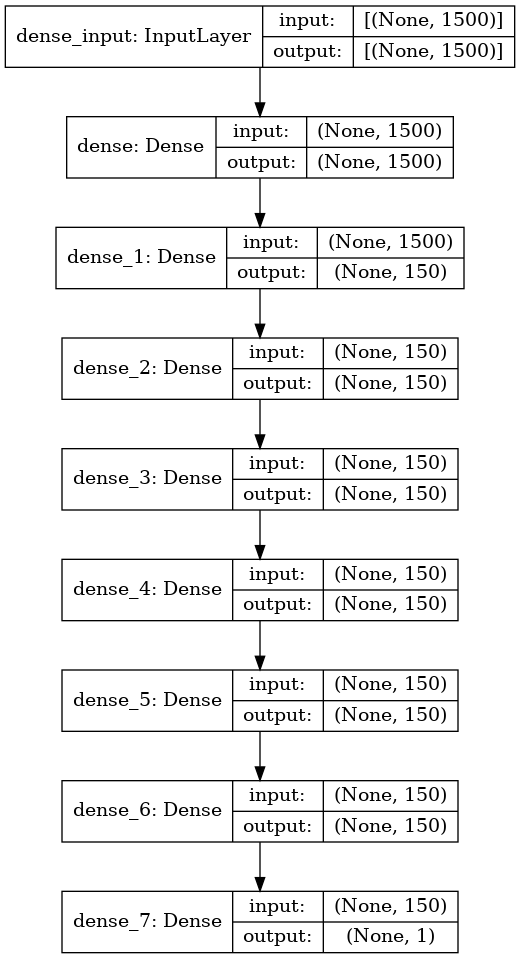

time: 142 ms (started: 2021-10-09 15:49:33 +00:00)


In [12]:
plot_model(model, "keras.png", show_shapes=True)

In [13]:
## Training

time: 370 µs (started: 2021-10-09 15:49:33 +00:00)


In [14]:
def train_model(model, epochs, batch_size, train_batch_gen, test_batch_gen):
    history = model.fit(x=train_batch_gen, 
                        epochs=epochs, 
                        batch_size=batch_size, 
                        validation_data=test_batch_gen,
                        use_multiprocessing=True)
    
    test_loss, test_acc = model.evaluate_generator(test_batch_gen, verbose=3)

    return model, test_loss, test_acc, history

time: 1.06 ms (started: 2021-10-09 15:49:33 +00:00)


In [15]:
model, test_loss, test_acc, history = train_model(model, 8, batch_size, train_batch_gen, test_batch_gen)

Epoch 1/8


2021-10-09 15:49:33.293967: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


14602/14602 [==============================] - 311s 21ms/step - loss: 7.8405 - accuracy: 0.4917 - val_loss: 7.7987 - val_accuracy: 0.4944
Epoch 2/8
14602/14602 [==============================] - 311s 21ms/step - loss: 7.8406 - accuracy: 0.4917 - val_loss: 7.7987 - val_accuracy: 0.4944
Epoch 3/8
14602/14602 [==============================] - 312s 21ms/step - loss: 7.8405 - accuracy: 0.4917 - val_loss: 7.7987 - val_accuracy: 0.4944
Epoch 4/8
14602/14602 [==============================] - 312s 21ms/step - loss: 7.8406 - accuracy: 0.4917 - val_loss: 7.7987 - val_accuracy: 0.4944
Epoch 5/8
14602/14602 [==============================] - 311s 21ms/step - loss: 7.8405 - accuracy: 0.4917 - val_loss: 7.7987 - val_accuracy: 0.4944
Epoch 6/8
14602/14602 [==============================] - 314s 21ms/step - loss: 7.8405 - accuracy: 0.4917 - val_loss: 7.7987 - val_accuracy: 0.4944
Epoch 7/8
14602/14602 [==============================] - 313s 21ms/step - loss: 7.8405 - accuracy: 0.4917 - val_loss: 7.79

/usr/local/lib/python3.9/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


time: 42min 4s (started: 2021-10-09 15:49:33 +00:00)


In [16]:
## Metrics

time: 306 µs (started: 2021-10-09 16:31:37 +00:00)


In [17]:
print("Loss: ", test_loss)
print("Accuracy: ", test_acc)

Loss:  7.798654079437256
Accuracy:  0.4944140613079071
time: 3.96 ms (started: 2021-10-09 16:31:37 +00:00)


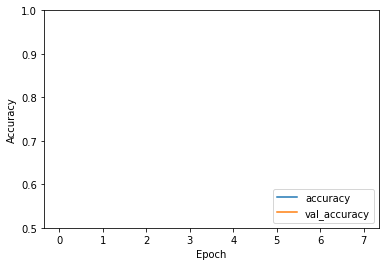

time: 258 ms (started: 2021-10-09 16:31:37 +00:00)


In [18]:
if 'accuracy' in history.history:
    plt.plot(history.history['accuracy'], label='accuracy')
elif 'acc' in history.history:
    plt.plot(history.history['acc'], label='accuracy')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
elif 'val_acc' in history.history:
    plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [19]:
## Testing

time: 451 µs (started: 2021-10-09 16:31:37 +00:00)


In [20]:
def frame_is_bad(frame):
    return round(max(0., min(1., model.predict(np.asarray(load_chunk([frame])))[0][0])) * 100, 2)

time: 4.65 ms (started: 2021-10-09 16:31:37 +00:00)


In [21]:
print("Is bad ?", frame_is_bad(X_test[0]), "%")
print("Expected:", Y_test[0])

Is bad ? 0.0 %
Expected: 1
time: 144 ms (started: 2021-10-09 16:31:37 +00:00)


In [22]:
print("Is bad ?", frame_is_bad(X_test[1]), "%")
print("Expected:", Y_test[1])

Is bad ? 0.0 %
Expected: 1
time: 70.6 ms (started: 2021-10-09 16:36:09 +00:00)


In [23]:
print("Is bad ?", frame_is_bad(X_test[2]), "%")
print("Expected:", Y_test[2])

Is bad ? 0.0 %
Expected: 0
time: 45.5 ms (started: 2021-10-09 16:36:35 +00:00)


In [24]:
print("Is bad ?", frame_is_bad(X_test[3]), "%")
print("Expected:", Y_test[3])

Is bad ? 0.0 %
Expected: 1
time: 69.8 ms (started: 2021-10-09 16:36:36 +00:00)
